In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle
import random

In [2]:
DATADIR = "img"
CATEGORIES = ['healthy','miner','rust','phoma']

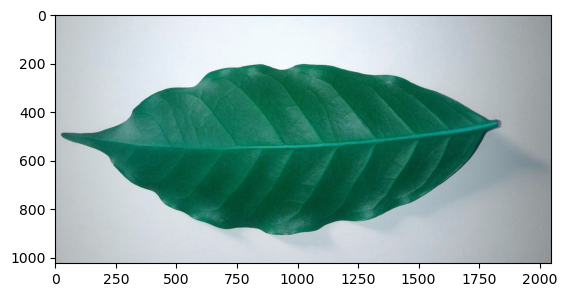

In [3]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img))  
        plt.imshow(img_array, cmap='gray')  
        plt.show() 

        break  
    break 

In [4]:
IMG_SIZE = 224

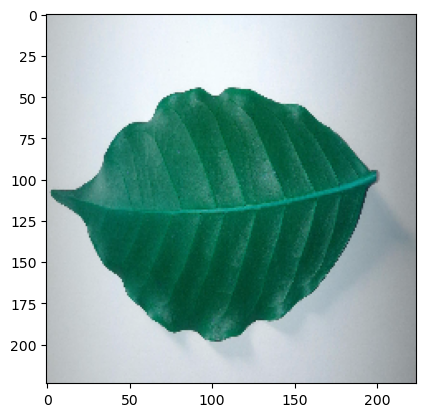

In [5]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [6]:
data = []

def create_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img))  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                data.append([new_array, class_num])  
            except Exception as e:  
                pass

create_data()

print(len(data))

100%|████████████████████████████████████████████████████████████████████████████████| 348/348 [00:06<00:00, 52.74it/s]

1538


In [7]:
random.shuffle(data)

In [8]:
for sample in data[:10]:
    print(sample[1])

3
2
0
1
1
2
3
1
3
1


In [9]:
x = []
y = []

for features,label in data:
    x.append(features)
    y.append(label)

print(x[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

[[[[196 200 211]
   [196 200 211]
   [196 200 211]
   ...
   [167 180 192]
   [172 181 194]
   [171 180 193]]

  [[196 200 211]
   [196 200 211]
   [196 200 211]
   ...
   [170 182 194]
   [170 179 192]
   [172 181 194]]

  [[196 200 211]
   [196 200 211]
   [197 201 212]
   ...
   [171 183 195]
   [171 180 193]
   [171 180 193]]

  ...

  [[198 200 211]
   [199 201 212]
   [200 202 213]
   ...
   [168 180 192]
   [167 179 191]
   [166 178 190]]

  [[198 200 211]
   [198 200 211]
   [197 199 210]
   ...
   [168 180 191]
   [166 178 190]
   [166 178 190]]

  [[198 200 211]
   [198 200 211]
   [199 201 212]
   ...
   [166 178 190]
   [166 178 190]
   [166 178 190]]]]


In [10]:
pickle_out = open("x.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [11]:
pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)